In [1]:
# maps

In [2]:
import pandas as pd
import pickle
import pysal as ps
import geopandas as gpd
from geopandas import GeoDataFrame
import geopy
import xlrd
from ukpostcodeutils import validation
from scipy.special import ndtri
from scipy.stats import chi2
from math import sqrt
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
from shapely.geometry import Point
from tqdm import tqdm
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx
from tqdm import tqdm

%matplotlib inline

/home/drcjar/anaconda3/envs/gds/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


In [3]:
infile = open('df','rb')
df = pickle.load(infile)
infile.close()

infile = open('dcut','rb')
dcut = pickle.load(infile)
infile.close()

infile = open('areacut','rb')
areacut = pickle.load(infile)
infile.close()

infile = open('rural_nsyc_vs_syc','rb')
rural_nsyc_vs_syc = pickle.load(infile)
infile.close()

infile = open('urban_nsyc_vs_syc','rb')
urban_nsyc_vs_syc = pickle.load(infile)
infile.close()

infile = open('rural_coastal_syc_vs_rural_coastal_nsyc','rb')
rural_coastal_syc_vs_rural_coastal_nsyc = pickle.load(infile)
infile.close()

infile = open('urban_coastal_syc_vs_rural_coastal_nsyc','rb')
urban_coastal_syc_vs_rural_coastal_nsyc = pickle.load(infile)
infile.close()


l = dict(zip(['cr', 'ar', 'ds', 'smr'], [i for i in range(0,4)]))
l2 = dict(zip(['cr2', 'ar2', 'ds2', 'smr2', 'da2'], [i for i in range(0,5)]))

# dcut is dockyard cuts
# areacut is area cuts
# cr = crude rate, ar = age-adjusted rate, ds = directly standardised rate, smr= indirect smr
# da = dockyard analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ce8ffa4e0>]],
      dtype=object)

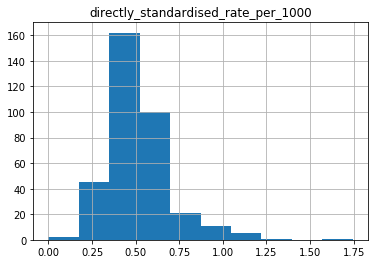

In [4]:
areacut['all-years'][l['ds']]['LAD16CD'].hist(column='directly_standardised_rate_per_1000')

In [5]:
areacut['all-years'][l['ds']]['LAD16CD']

,LAD16CD,COUNT,o_var,directly_standardised_rate_per_1000,dsr_var,observed,lower_o,upper_o,dsr_lower,dsr_upper
0,E06000001,101.0,60.228070,1.083781,0.006372,101.0,82.264284,122.725296,0.891064,1.307248
1,E06000002,87.0,39.701754,0.687772,0.002458,87.0,69.681385,107.315375,0.551516,0.847607
2,E06000003,114.0,80.111111,0.735971,0.003196,114.0,94.034196,136.949918,0.609855,0.880938
3,E06000004,164.0,171.467836,0.911373,0.005147,164.0,139.858949,191.110521,0.779110,1.059905
4,E06000005,75.0,36.385965,0.685302,0.003054,75.0,58.990019,94.014401,0.538616,0.859515
5,E06000006,75.0,33.830409,0.682704,0.002805,75.0,58.990019,94.014401,0.536918,0.855848
6,E06000007,103.0,64.035088,0.536703,0.001766,103.0,84.070085,124.918588,0.437297,0.651804
7,E06000008,51.0,16.228070,0.430075,0.001139,51.0,37.970021,67.056965,0.320911,0.564599
8,E06000009,87.0,42.257310,0.526380,0.001510,87.0,69.681385,107.315375,0.422869,0.647802
9,E06000010,114.0,61.666667,0.512751,0.001232,114.0,94.034196,136.949918,0.423513,0.615327


In [6]:
# we obtain a country boundary file from gov geoportal (the UK)
c = gpd.read_file('country2.json')
c.crs = {'init': 'epsg:4326'}

# UK projection for the UK
c = c.to_crs(epsg=27700)

# England and Wales Map
ew = c[c['ctry17nm'] != 'Scotland'] 

# UK projection for the UK
ew = ew.to_crs(epsg=27700)

lads = gpd.read_file('lads.json')
lads.crs = {'init': 'epsg:4326'}
lads = lads.to_crs(epsg=27700)
lads.rename(index=str, columns={"lad16cd": "LAD16CD"}, inplace=True)
lads = lads[lads['LAD16CD'].str[:1] != 'S'] # discard scotland
lads = lads[lads['LAD16CD'].str[:1] != 'N'] # discard northern ireland

wards = gpd.read_file('wards.json')
wards.crs = {'init': 'epsg:4326'}
wards = wards.to_crs(epsg=27700)
wards.rename(index=str, columns={"wd16cd": "WD16CD"}, inplace=True)
wards = wards[wards['WD16CD'].str[:1] != 'S'] # discard scotland
wards = wards[wards['WD16CD'].str[:1] != 'N'] # discard northern ireland

# dock locations
gdf = gpd.read_file('docks_edited.geojson')
gdf = gdf.to_crs(epsg=27700)
gdf = gdf[gdf['ctry17nm'] != 'Scotland'] # should happen earlier


/home/drcjar/anaconda3/envs/gds/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


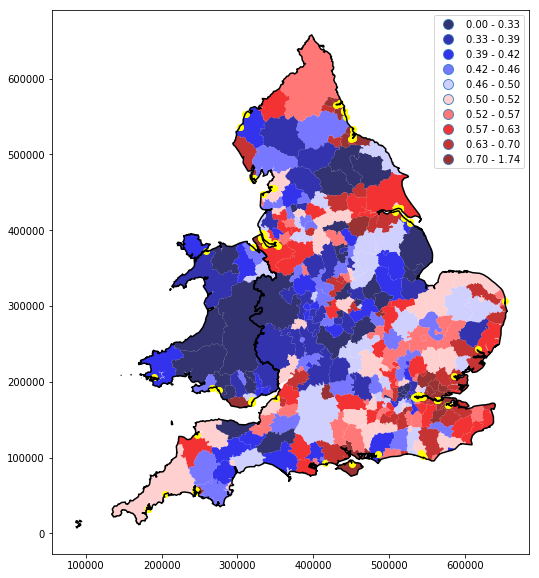

In [7]:
ax = ew.boundary.plot(figsize=(10,10), color='black')
GeoDataFrame(pd.merge(areacut['all-years'][l['ds']]['LAD16CD'], lads, on='LAD16CD')).plot(column='directly_standardised_rate_per_1000', scheme='quantiles', cmap='seismic', k=10, legend=True, ax=ax, alpha=0.8)
gdf.plot(ax=ax, color='yellow')

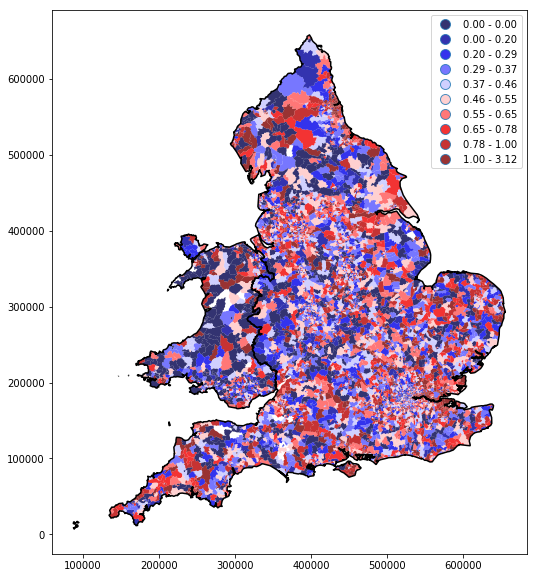

In [8]:
ax = ew.boundary.plot(figsize=(10,10), color='black')
GeoDataFrame(pd.merge(areacut['all-years'][l['ds']]['WD16CD'], wards, on='WD16CD')).plot(column='directly_standardised_rate_per_1000', scheme='quantiles', cmap='seismic', k=10, legend=True, ax=ax, alpha=0.8)

In [9]:
def spatial_lag_plot_ward(df):
    """
    spatial lag plot of ward smr
    """
    wards = gpd.read_file('wards.json')
    wards.rename(index=str, columns={"wd16cd": "WD16CD"}, inplace=True)

    c = gpd.read_file('country2.json')
    ew = c[c['ctry17nm'] != 'Scotland'].copy() 
    ew.geometry = ew.geometry.to_crs({'init': 'epsg:27700'})

    wards = wards[wards.WD16CD.str[:1] != 'S']
    wards.geometry = wards.geometry.to_crs({'init': 'epsg:27700'})

    # meso mortality data
    df = GeoDataFrame(pd.merge(df, wards, on='WD16CD'))
    df.crs = {'init': 'epsg:27700'} 
    df.geometry = df.geometry.to_crs({'init': 'epsg:27700'})

    islands = [4803, 5476, 5665]
    df = df[~df.index.isin(islands)]
    w = ps.weights.Queen.from_dataframe(df)
    w.transform = 'r'
    smrlag = ps.lag_spatial(w, df['directly_standardised_rate_per_1000'])
    smrlagQ10 = ps.Quantiles(smrlag, k=10)

    f, ax = plt.subplots(1, figsize=(9, 9))
    ax = df.assign(cl=smrlagQ10.yb).plot(column='cl', categorical=True, \
            k=10, cmap='OrRd', linewidth=0.1, ax=ax, \
            edgecolor='white', legend=True, figsize=(10,10))

    wards[~wards.WD16CD.isin(df.WD16CD)].plot(color = 'white', ax=ax) # hack to not have holes
    ew.boundary.plot(ax=ax, alpha=0.5)

    ax.set_axis_off()
    
    plt.title("Ward level male mesothelioma SMR spatial lag deciles 2002-2015")
    plt.savefig("Male_Mesothelioma_SMR_Spatial_Lag_Deciles_2002-2015.png")

    plt.show()

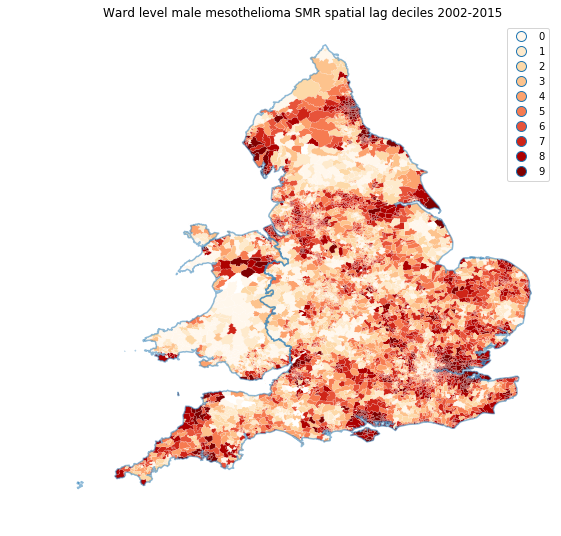

In [10]:
spatial_lag_plot_ward(areacut['all-years'][l['ds']]['WD16CD'])

In [11]:
def lisa_analysis_ward(df):
    """
    lisa analysis
    """
    # ward boundaries
    wards = gpd.read_file('wards.json')
    wards.rename(index=str, columns={"wd16cd": "WD16CD"}, inplace=True)
    wards.crs = {'init': 'epsg:4326'}

    # we obtain a country boundary file from gov geoportal (the UK)
    c = gpd.read_file('country2.json')
    c.crs = {'init': 'epsg:4326'}

    # UK projection for the UK
    c = c.to_crs(epsg=27700)

    # England and Wales Map
    ew = c[c['ctry17nm'] != 'Scotland'] 
    wards = wards[wards.WD16CD.str[:1] != 'S']

    # dock locations
    gdf = gpd.read_file('docks_edited.geojson')
    gdf = gdf.to_crs(epsg=27700)
    gdf = gdf[gdf['ctry17nm'] != 'Scotland'] # should happen earlier


    # add ward boundary data
    df = GeoDataFrame(pd.merge(df, wards, on='WD16CD'))
    df.crs = {'init': 'epsg:4326'}
    df = df.to_crs(epsg=27700)

    # change wards to 27700
    wards = wards.to_crs(epsg=27700)

    islands = [ 4803, 5476, 5665]
    df = df[~df.index.isin(islands)]
    w = ps.weights.Queen.from_dataframe(df)
    lisa = ps.Moran_Local(df['directly_standardised_rate_per_1000'].values, w, permutations=9999)
    df['significant'] = lisa.p_sim < 0.05
    df['quadrant'] = lisa.q
    sig = 1 * (lisa.p_sim < 0.05)
    hotspot = 1 * (sig * lisa.q==1)
    coldspot = 3 * (sig * lisa.q==3)
    doughnut = 2 * (sig * lisa.q==2)
    diamond = 4 * (sig * lisa.q==4)

    spots = ['n.sig.', 'hot spot']
    labels = [spots[i] for i in hotspot*1]

    from matplotlib import colors
    hmap = colors.ListedColormap([ 'red', 'lightgrey'])
    ax = df.assign(cl=labels).plot(column='cl', categorical=True, \
            k=2, cmap=hmap, linewidth=0.1, \
            edgecolor='white', legend=True, figsize=(10,10))
    ew.boundary.plot(ax=ax, alpha=0.4)
    gdf.plot(ax=ax, markersize=10, alpha=0.5, color='yellow')
    wards[~wards.WD16CD.isin(df.WD16CD)].plot(color = 'lightgrey', ax=ax) # hack to not have holes
    plt.axis('off')
    #plt.title("Male Mesothelioma SMR Local Indicators of Spatial Association 2002-2015 (ward level hotspots), dockyards shown in blue")
    plt.savefig("Male_Mesothelioma_SMR_Local_Indicators_of_Spatial_Association_2002-2015_ward_level_hotspots_dockyards_shown_in_blue.png")


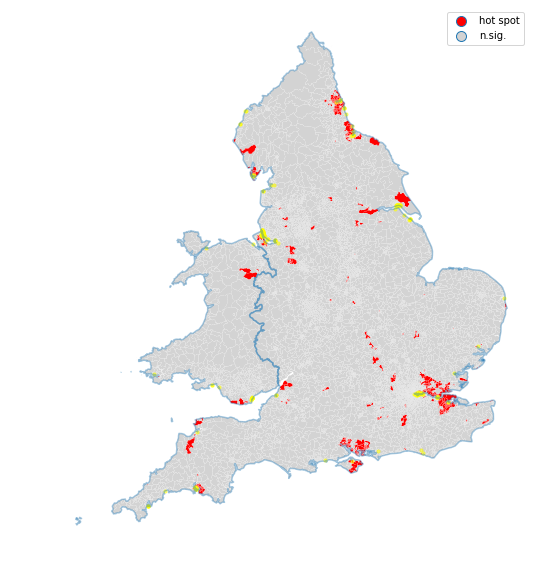

In [12]:
lisa_analysis_ward(areacut['all-years'][l['ds']]['WD16CD'])

In [13]:
def spatial_lag_plot_lad(df):
    """
    spatial lag plot of lad directly standardised rates
    """
    lads = gpd.read_file('lads.json')
    lads.rename(index=str, columns={"lad16cd": "LAD16CD"}, inplace=True)

    c = gpd.read_file('country2.json')
    ew = c[c['ctry17nm'] != 'Scotland'].copy() 
    ew.geometry = ew.geometry.to_crs({'init': 'epsg:27700'})

    lads = lads[lads.LAD16CD.str[:1] != 'S']
    lads.geometry = lads.geometry.to_crs({'init': 'epsg:27700'})

    # meso mortality data
    df = GeoDataFrame(pd.merge(df, lads, on='LAD16CD'))
    df.crs = {'init': 'epsg:27700'} 
    df.geometry = df.geometry.to_crs({'init': 'epsg:27700'})

    islands = [45, 51, 326]
    df = df[~df.index.isin(islands)]
    w = ps.weights.Queen.from_dataframe(df)
    w.transform = 'r'
    smrlag = ps.lag_spatial(w, df['directly_standardised_rate_per_1000'])
    smrlagQ10 = ps.Quantiles(smrlag, k=10)

    f, ax = plt.subplots(1, figsize=(9, 9))
    ax = df.assign(cl=smrlagQ10.yb).plot(column='cl', categorical=True, \
            k=10, cmap='OrRd', linewidth=0.1, ax=ax, \
            edgecolor='white', legend=True, figsize=(10,10))
    
    leg = ax.get_legend()
    leg.get_texts()[0].set_text('Lowest decile')
    leg.get_texts()[1].set_text('10-20')
    leg.get_texts()[2].set_text('20-30')
    leg.get_texts()[3].set_text('30-40')
    leg.get_texts()[4].set_text('40-50')
    leg.get_texts()[5].set_text('50-60')
    leg.get_texts()[6].set_text('60-70')
    leg.get_texts()[7].set_text('70-80')
    leg.get_texts()[8].set_text('80-90')
    leg.get_texts()[9].set_text('Highest decile')

    lads[~lads.LAD16CD.isin(df.LAD16CD)].plot(color = 'white', ax=ax) # hack to not have holes
    ew.boundary.plot(ax=ax, alpha=0.5)

   #ax.set_axis_off()
    
    #plt.title("Ward level male mesothelioma SMR spatial lag deciles 2002-2015")
    #plt.savefig("Male_Mesothelioma_SMR_Spatial_Lag_Deciles_2002-2015.png")
    # dock locations
    gdf = gpd.read_file('docks_edited.geojson')
    gdf = gdf.to_crs(epsg=27700)
    gdf = gdf[gdf['ctry17nm'] != 'Scotland'] # should happen earlier

    # dock locations
    gdf = gpd.read_file('docks_edited.geojson')
    gdf = gdf.to_crs(epsg=27700)
    gdf = gdf[gdf['ctry17nm'] != 'Scotland'] # should happen earlier
    gdf.plot(ax=ax,color='yellow')
        
    plt.axis('off')
    
       
   # plt.title("Local authority district level male mesothelioma age-adjusted rate spatial lag deciles 2002-2015. Dockywards in yellow.")
    plt.savefig("Male_Mesothelioma_DSR_LAD_Spatial_Lag_Deciles_2002-2015.png")

    plt.show()

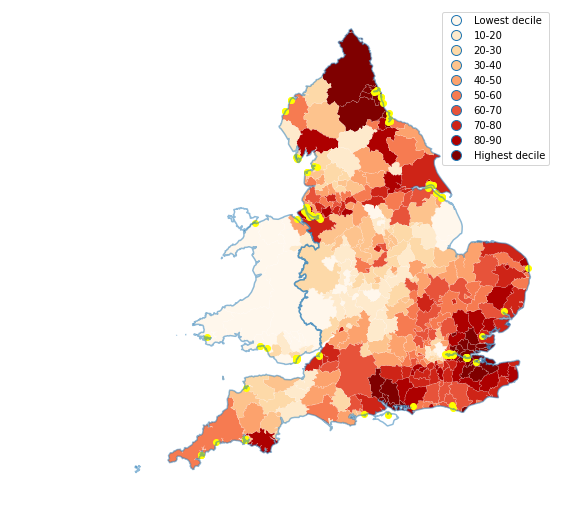

In [14]:
spatial_lag_plot_lad(areacut['all-years'][l['ds']]['LAD16CD'])

In [15]:
def lisa_analysis_lad(df):
    """
    lisa analysis
    """
    # lad boundaries
    lads = gpd.read_file('lads.json')
    lads.rename(index=str, columns={"lad16cd": "LAD16CD"}, inplace=True)
    lads.crs = {'init': 'epsg:4326'}
    lads = lads[lads['LAD16CD'].str[:1] != 'N'] # discard northern ireland


    # we obtain a country boundary file from gov geoportal (the UK)
    c = gpd.read_file('country2.json')
    c.crs = {'init': 'epsg:4326'}

    # UK projection for the UK
    c = c.to_crs(epsg=27700)

    # England and Wales Map
    ew = c[c['ctry17nm'] != 'Scotland'] 
    lads = lads[lads.LAD16CD.str[:1] != 'S']

    # dock locations
    gdf = gpd.read_file('docks_edited.geojson')
    gdf = gdf.to_crs(epsg=27700)
    gdf = gdf[gdf['ctry17nm'] != 'Scotland'] # should happen earlier


    # add lad boundary data
    df = GeoDataFrame(pd.merge(df, lads, on='LAD16CD'))
    df.crs = {'init': 'epsg:4326'}
    df = df.to_crs(epsg=27700)

    # change lads to 27700
    lads = lads.to_crs(epsg=27700)

    islands = [45, 51, 326]
    df = df[~df.index.isin(islands)]
    w = ps.weights.Queen.from_dataframe(df)
    lisa = ps.Moran_Local(df['directly_standardised_rate_per_1000'].values, w, permutations=9999)
    df['significant'] = lisa.p_sim < 0.05
    df['quadrant'] = lisa.q
    sig = 1 * (lisa.p_sim < 0.05)
    hotspot = 1 * (sig * lisa.q==1)
    coldspot = 3 * (sig * lisa.q==3)
    doughnut = 2 * (sig * lisa.q==2)
    diamond = 4 * (sig * lisa.q==4)

    spots = ['n.sig.', 'hot spot']
    labels = [spots[i] for i in hotspot*1]

    from matplotlib import colors
    hmap = colors.ListedColormap([ 'red', 'lightgrey'])
    ax = df.assign(cl=labels).plot(column='cl', categorical=True, \
            k=2, cmap=hmap, linewidth=0.1, \
            edgecolor='white', legend=True, figsize=(10,10))
    ew.boundary.plot(ax=ax, alpha=0.4)
    gdf.plot(ax=ax, markersize=10, alpha=0.5, color='Black')
    lads[~lads.LAD16CD.isin(df.LAD16CD)].plot(color = 'lightgrey', ax=ax) # hack to not have holes
    plt.axis('off')
    plt.title("Male Mesothelioma age adjusted rates Indicators of Spatial Association 2002-2015 (LAD level hotspots), dockyards shown in blue")
    plt.savefig("Male_Mesothelioma_age_adjusted_rates_Local_Indicators_of_Spatial_Association_2002-2015_LAD_level_hotspots_dockyards_shown_in_blue.png")


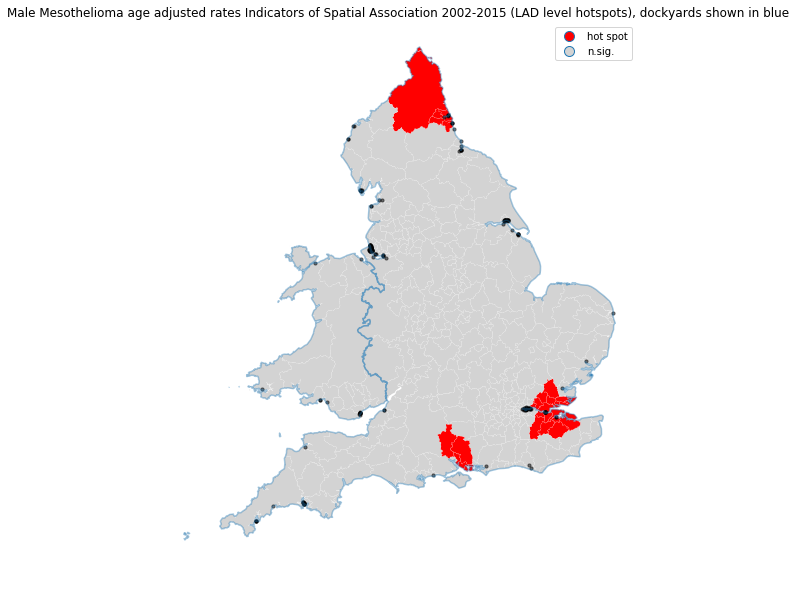

In [16]:
lisa_analysis_lad(areacut['all-years'][l['ds']]['LAD16CD'])